### Emittance growth for bunch splitted in longitudinal slices

- Plot the emittance and emittance growth for each one of the longitudinal slices of the bunch. 
- The simulation needs to be performed with frozen longitudinal motion. 
- The file.pkl needs to contain the emittance values for each slice at each turn. 

In [1]:
import sys
sys.path.append('../../utils/')

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-sci
def moving_average(x, window):
    return np.convolve(x, np.ones(window), 'valid') / window

In [12]:
path2studies = './'

In [13]:
emitY_perSlice = pickle.load(open(path2studies+'file.pkl', 'rb'))

In [14]:
# study parameters
n_runs = 1 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
n_slices = 500

### Plot emittances of the initial distribution

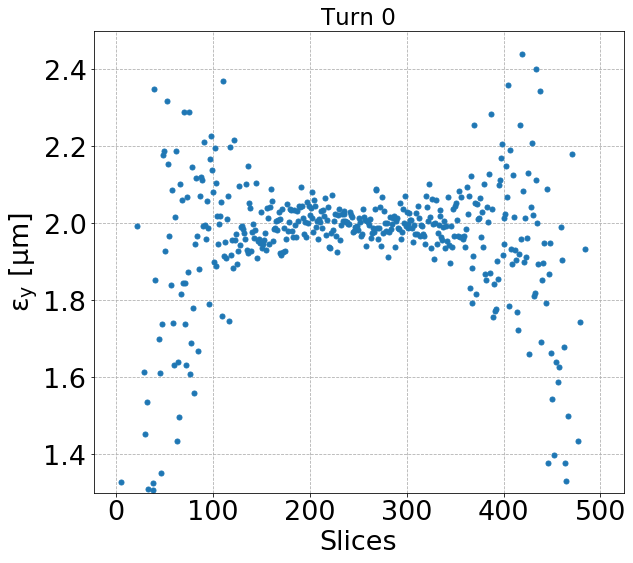

In [15]:
slices = np.arange(n_slices)
selected_turn = 0
plt.plot(slices, np.array(emitY_perSlice[selected_turn])*1e6, 'o')
plt.xlabel('Slices')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.title(f'Turn {selected_turn}')
plt.ylim(1.3, 2.5)

savefig = False
if savefig:
    plt.savefig('ey_initialDistribution.png', bbox_inches='tight')

### Remove the first and last 150 slices

- Larger emittance is obtained for the slices of the head and the tail of the beam.
- Larger statistical uncertainty than in the center of the beam due to the small number of particles in these slices (6D gaussian distribution)
- Thus, the first and last 150 slices will be excluded from the following analysis


In [16]:
selected_turn = 0
n_remove_slices = 150
new_slices = slices[n_remove_slices:-n_remove_slices]
new_emitY = emitY_perSlice[selected_turn][n_remove_slices:-n_remove_slices]

(1.3, 2.5)

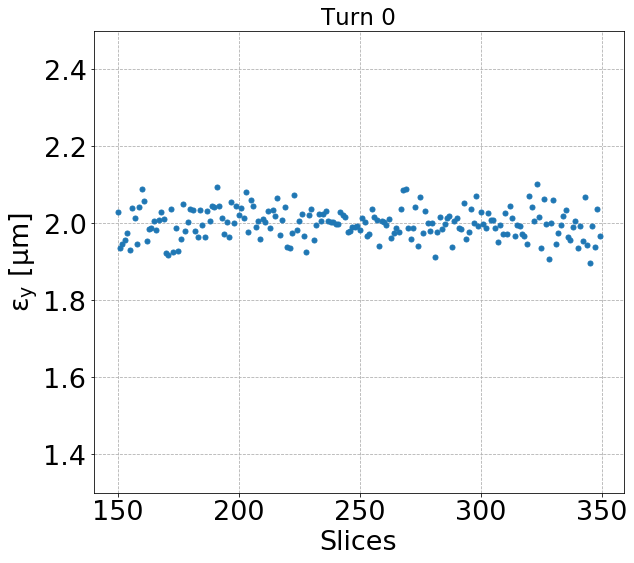

In [17]:
plt.plot(new_slices, np.array(new_emitY)*1e6, 'o')
plt.xlabel('Slices')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.title(f'Turn {selected_turn}')
plt.ylim(1.3, 2.5)

### Moving average

- To smoothen out the fluctuations of the emittance values in the center of the bunch, a moving average is used for the following analysis.


In [18]:
selected_turn = 0
emitY_moving_average = moving_average(new_emitY, window=20)

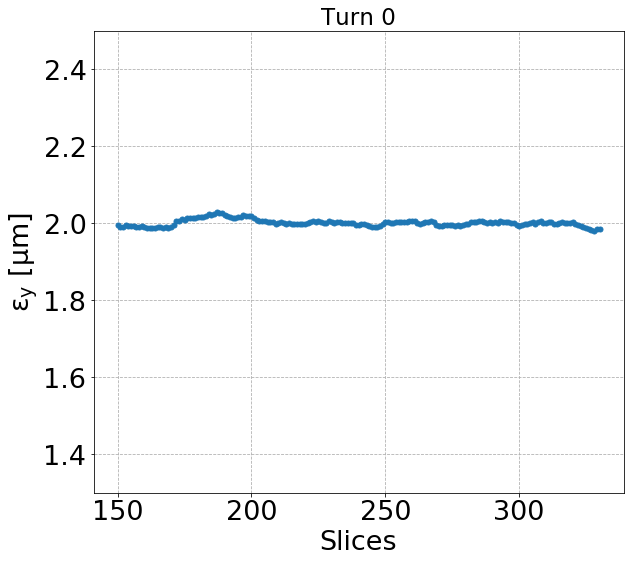

In [19]:
plt.plot(new_slices[:-19], np.array(emitY_moving_average)*1e6, 'o')
plt.xlabel('Slices')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.title(f'Turn {selected_turn}')
plt.ylim(1.3, 2.5)


savefig = False
if savefig:
    plt.savefig('ey_initialDistribution_MovingAverage.png', bbox_inches='tight')

### Plot emittance per slice for selected turns
- After removing the first and last 150 slices and performin a moving average, window 20, for the slices of the center of the bunch.

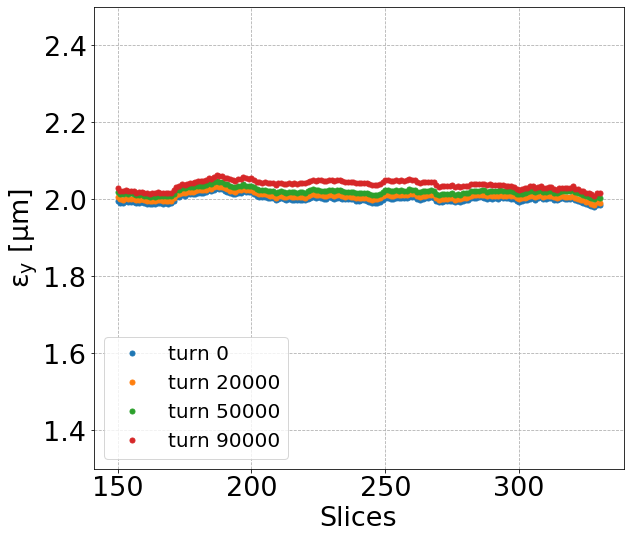

In [20]:
selected_turns = [0, 200, 500, 900]
n_remove_slices = 150 
new_slices = slices[n_remove_slices:-n_remove_slices]
for selected_turn in selected_turns:
    new_emitY = emitY_perSlice[selected_turn][n_remove_slices:-n_remove_slices]
    emitY_moving_average = moving_average(new_emitY, window=20)
    plt.plot(new_slices[:-19], np.array(emitY_moving_average)*1e6, 'o', label=f'turn {selected_turn*decTurns}')

plt.xlabel('Slices')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.ylim(1.3, 2.5)
plt.legend(loc=3)


savefig = False
if savefig:
    plt.savefig('ey_initialDistribution_MovingAverage_SelectedTurns.png', bbox_inches='tight')

### Compute growth rate for each one of the slices
- After removing the first and last 150 slices and performin a moving average, window 20, for the slices of the center of the bunch.

In [21]:
n_remove_slices = 150 
emitY_perSlice_dict = {}

new_slices = slices[n_remove_slices:-n_remove_slices][:-19] # new slices after removing the ones from head and tail

for selected_slice in new_slices:
    emitY_perSlice_dict[f'slice {selected_slice}'] = []

In [22]:
for selected_turn in range(int(n_turns/decTurns)):   
    
    new_emitY = emitY_perSlice[selected_turn][n_remove_slices:-n_remove_slices] # slices with removed head and tail
    emitY_moving_average = moving_average(new_emitY, window=20)
    
    for i, selected_slice in enumerate(new_slices):   
         emitY_perSlice_dict[f'slice {selected_slice}'].append(emitY_moving_average[i])

### Plot emittance growth for selected slices

In [23]:
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

[150. 170. 190. 210. 230. 250. 270. 290. 310. 330. 350.]


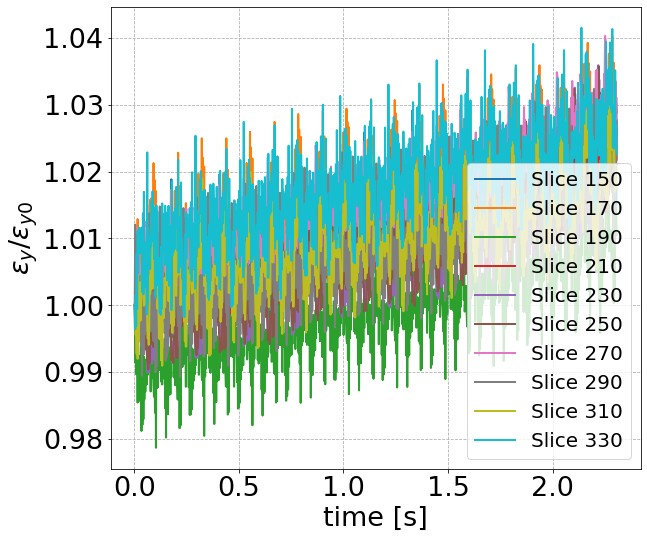

In [24]:
selected_slices = np.linspace(150, 350, 11)
print(selected_slices)
for selected_slice in selected_slices[:-1]:
    selected_slice = int(selected_slice)
    plt.plot(tspan, emitY_perSlice_dict[f'slice {selected_slice}']/ emitY_perSlice_dict[f'slice {selected_slice}'][0], label=f'Slice {selected_slice}')
plt.ylabel(r'$\epsilon_y / \epsilon_{y0}$')
plt.xlabel('time [s]')
plt.grid(linestyle='dashed')
plt.legend()


savefig = False
if savefig:
    plt.savefig('eyvsTime_PostProcessed_SelectedSlices.png', bbox_inches='tight')

### Compute the growth rate

In [25]:
dey_perSlice = []
dey_err_perSlice = []

for selected_slice in selected_slices[:-1]:
    selected_slice = int(selected_slice)
    # linear fit
    [m_y, b_y], cov_y = np.polyfit(tspan, emitY_perSlice_dict[f'slice {selected_slice}'], 1, cov=True)
    # compute the error of the gradient of the fit slope
    err_y = np.sqrt(np.diag(cov_y))
    dey_perSlice.append(m_y)
    dey_err_perSlice.append(err_y[0])

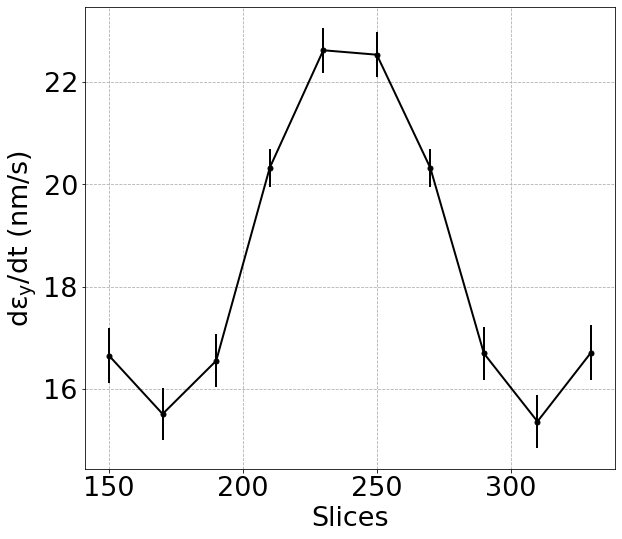

In [26]:
plt.errorbar(selected_slices[:-1], np.array(dey_perSlice)*1e9, yerr=np.array(dey_err_perSlice)*1e9 , marker='o', c='k')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Slices')
plt.grid(linestyle='dashed')


savefig = False
if savefig:
    plt.savefig('deyvsSlice_postProcessed.png', bbox_inches='tight')